<a href="https://colab.research.google.com/github/MarcoParola/medical_images_classification/blob/main/Scratch_CNN_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ipynb

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import collections 
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from sklearn import metrics

In [ ]:
tf.random.set_seed(7)

In [ ]:
projectPath = 'drive/MyDrive/Colab Notebooks/cidl/'
dataPath = 'numpy data/'

In [ ]:
%cd $projectPath
%run utils.ipynb
%cd '../../../..'

/content/drive/MyDrive/Colab Notebooks/cidl
/content


In [ ]:
# load data
imagesTrainPub, labelsTrainPub, imagesTestPub, labelsTestPub, imagesTestPriv = load_data(projectPath + dataPath)

# normalize data 
imagesTrainPub = scaleData(imagesTrainPub)
imagesTestPub = scaleData(imagesTestPub)

In [ ]:
# create (if not exists) the folder to store the models
dir_name = 'models/task2_2/'
if not os.path.exists(projectPath + dir_name):
  os.makedirs(projectPath + dir_name)

# **Task 2**

## 2.2 Binary calssification: Benign and Malignant
Classes:
*   Benign 1568
*   Malignant 1108

In [ ]:
# 0 -> benign
# 1 -> malignant

# prepare trainig-set
trainingSet = []
trainingLabels = []
benignNum = 0
malignantNum = 0

trainingSet = []
trainingLabels = []
benignNum = 0
malignantNum = 0
for i in range(len(labelsTrainPub)):
  if labelsTrainPub[i] == 1 or labelsTrainPub[i] == 3:
    trainingSet.append(imagesTrainPub[i])
    trainingLabels.append(0)
    benignNum = benignNum + 1
  if labelsTrainPub[i] == 2 or labelsTrainPub[i] == 4:
    trainingSet.append(imagesTrainPub[i])
    trainingLabels.append(1)
    malignantNum = malignantNum + 1

trainingSet = np.array(trainingSet)
trainingSet = trainingSet.reshape(2676, 150, 150, 1)

training = []
for i in range(len(trainingSet)):
  training.append((trainingSet[i], trainingLabels[i]))

training = np.array(training)
np.random.seed(3)
np.random.shuffle(training)


trainingSet = []
trainingLabels = []

for i in range(len(training)):
  trainingSet.append(training[i][0])
  trainingLabels.append(training[i][1])

trainingSet = np.array(trainingSet)
trainingLabels = np.array(trainingLabels)

# prepare test-set
testSet = []
testLabels = []

for i in range(len(labelsTestPub)):
  if labelsTestPub[i] == 1 or labelsTestPub[i] == 3:
    testSet.append(imagesTestPub[i])
    testLabels.append(0)
  if labelsTestPub[i] == 2 or labelsTestPub[i] == 4:
    testSet.append(imagesTestPub[i])
    testLabels.append(1)

testSet = np.array(testSet)
testSet = testSet.reshape(336, 150, 150, 1)

# the output must have a categorigal values
testLabelsCategorical = to_categorical(np.array(testLabels))
trainingLabelsCategorical = to_categorical(np.array(trainingLabels))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


# **Compute data augmentation using ImageDataGenerator**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE = 64
dataGenerator = ImageDataGenerator(
      rotation_range=45,
      width_shift_range=0.15,
      height_shift_range=0.15,
      shear_range=20,
      zoom_range=0.15,
      horizontal_flip=True,
      fill_mode='reflect')


augmentedData = []
augmentedLabels = []

for j in range(0,len(trainingSet)):
  for i in range(0,4):
    dataGenerated = dataGenerator.flow(trainingSet[j].reshape(1,150,150,1), batch_size=4)
    augmentedData.append(dataGenerated[0].reshape(150, 150))
    augmentedLabels.append(trainingLabels[j])
    del dataGenerated

augmentedLabels = to_categorical((np.array(augmentedLabels)))

augmentedData = np.array(augmentedData)
augmentedData = augmentedData.reshape(len(augmentedData), 150, 150, 1)
print(augmentedData.shape, augmentedLabels.shape)



(10704, 150, 150, 1) (10704, 2)


# **Simple network, data augmented**

*   Rmsp (rate = 1e-4)
*   Dense hidden layer: 1
*   sigmoid



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 128)       7

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.77      0.69      0.73       219
           1       0.52      0.62      0.57       117

    accuracy                           0.67       336
   macro avg       0.65      0.66      0.65       336
weighted avg       0.68      0.67      0.67       336

11/11 [==============================] - 0s 9ms/step - loss: 0.6258 - accuracy: 0.6667
0.6257755160331726 0.6666666865348816


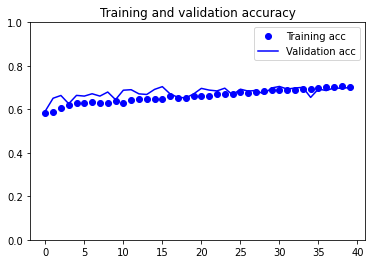

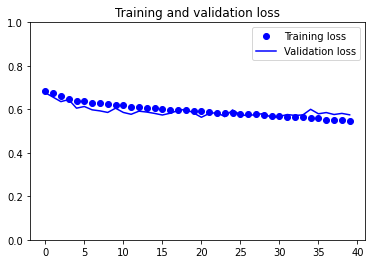

[0 1]
Normalized confusion matrix


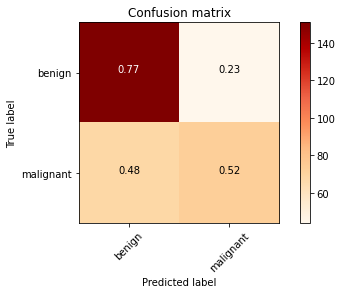

In [ ]:
tf.random.set_seed(7)
modelP = models.Sequential()
modelP.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1), padding='same'))
modelP.add(layers.MaxPooling2D((2, 2)))
modelP.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
modelP.add(layers.MaxPooling2D((2, 2)))
modelP.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
modelP.add(layers.MaxPooling2D((2, 2)))
modelP.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
modelP.add(layers.MaxPooling2D((2, 2)))

modelP.add(layers.Flatten())

modelP.add(layers.Dense(256, activation='relu'))
modelP.add(layers.Dropout(rate=.5))
modelP.add(layers.Dense(2, activation='sigmoid'))

modelP.summary()

#optimizers.RMSprop(lr=1e-4)
modelP.compile(optimizer= optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

earlyStopCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

history = modelP.fit(augmentedData, augmentedLabels, epochs=100, callbacks=[earlyStopCallback], batch_size=32, validation_split=0.2)

pred = modelP.predict_classes(testSet) 
print(metrics.classification_report(testLabels,pred))
test_loss, test_acc = modelP.evaluate(testSet, testLabelsCategorical)
print(test_loss, test_acc)
plot_accurancy_loss(history)
plot_confusionMatrix(modelP, testSet, testLabels, ['benign', 'malignant'])

# **Simple network, NO data augmented**

*   Rmsp (rate = 1e-4)
*   Dense hidden layer: 1
*   sigmoid

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 150, 150, 32)      320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 37, 37, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 18, 18, 128)      

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


11/11 [==============================] - 0s 9ms/step - loss: 0.6393 - accuracy: 0.6399
0.6393241882324219 0.6398809552192688


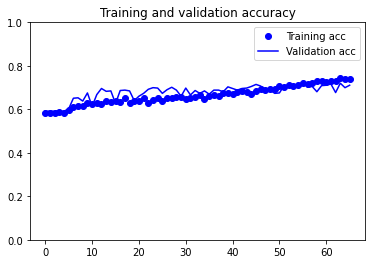

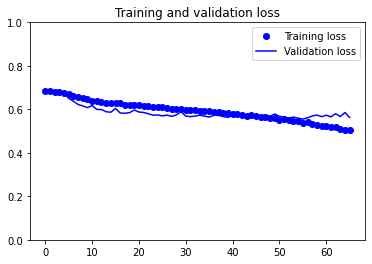

[0 1]
Normalized confusion matrix


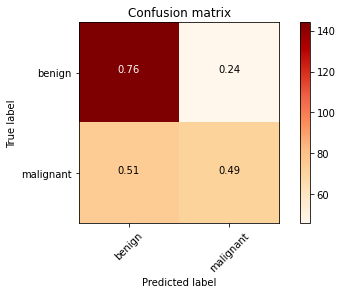

In [ ]:
tf.random.set_seed(7)
model8 = models.Sequential()
model8.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1), padding='same'))
model8.add(layers.MaxPooling2D((2, 2)))
model8.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model8.add(layers.MaxPooling2D((2, 2)))
model8.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model8.add(layers.MaxPooling2D((2, 2)))
model8.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model8.add(layers.MaxPooling2D((2, 2)))

model8.add(layers.Flatten())

model8.add(layers.Dense(256, activation='relu'))
model8.add(layers.Dropout(rate=.5))
model8.add(layers.Dense(2, activation='sigmoid'))

model8.summary()

#optimizers.RMSprop(lr=1e-4)
model8.compile(optimizer= optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

earlyStopCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)


history = model8.fit(trainingSet, trainingLabelsCategorical, epochs=100, callbacks=[earlyStopCallback], batch_size=32, validation_split=0.2)
#history = model8.fit(augmentedData, augmentedLabels, epochs=100, callbacks=[earlyStopCallback], batch_size=32, validation_split=0.2)

pred = model8.predict_classes(testSet) 
print(metrics.classification_report(testLabels,pred))
test_loss, test_acc = model8.evaluate(testSet, testLabelsCategorical)
print(test_loss, test_acc)
plot_accurancy_loss(history)
plot_confusionMatrix(model8, testSet, testLabels, ['benign', 'malignant'])

# **Model 2 with more conv-layers & one more dense layer**

*   Rmsp (rate = 1e-4)
*   Dense hidden layer: 2
*   sigmoid

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 150, 150, 32)      320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 150, 150, 64)      18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 75, 75, 64)        36928     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 75, 75, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 37, 37, 128)      

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.80      0.61      0.69       219
           1       0.50      0.72      0.59       117

    accuracy                           0.65       336
   macro avg       0.65      0.66      0.64       336
weighted avg       0.70      0.65      0.66       336

11/11 [==============================] - 0s 19ms/step - loss: 0.6283 - accuracy: 0.6488
0.6283054351806641 0.648809552192688


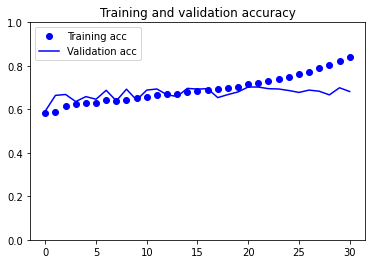

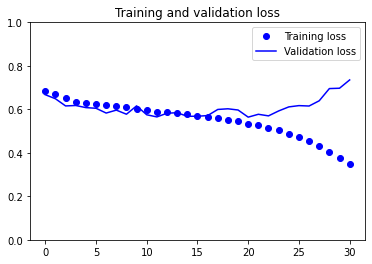

[0 1]
Normalized confusion matrix


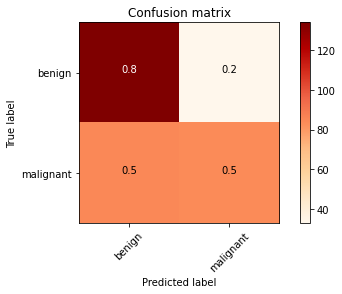

In [ ]:
tf.random.set_seed(7)
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1), padding='same'))
model1.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model1.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model1.add(layers.MaxPooling2D((2, 2)))

model1.add(layers.Flatten())
model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dense(2, activation='sigmoid'))

model1.summary()

model1.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

earlyStopCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)


history = model1.fit(augmentedData, augmentedLabels, epochs=100, callbacks=[earlyStopCallback], batch_size=32, validation_split=0.2)

pred = model1.predict_classes(testSet) 
print(metrics.classification_report(testLabels,pred))
test_loss, test_acc = model1.evaluate(testSet, testLabelsCategorical)
print(test_loss, test_acc)
plot_accurancy_loss(history)
plot_confusionMatrix(model1, testSet, testLabels, ['benign', 'malignant'])

# **Model 3**

*   Adam
*   Dense hidden layer: 2
*   Dropout layer between the 2 dense layers: rate = 0.2
*   sigmoid

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 150, 150, 32)      320       
_________________________________________________________________
dropout_2 (Dropout)          (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 150, 150, 64)      18496     
_________________________________________________________________
dropout_3 (Dropout)          (None, 150, 150, 64)      0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 75, 75, 64)        36928     
_________________________________________________________________
dropout_4 (Dropout)          (None, 75, 75, 64)       

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.66      0.97      0.79       219
           1       0.53      0.07      0.12       117

    accuracy                           0.65       336
   macro avg       0.60      0.52      0.45       336
weighted avg       0.62      0.65      0.55       336

11/11 [==============================] - 0s 19ms/step - loss: 0.6231 - accuracy: 0.6548
0.6231018304824829 0.6547619104385376


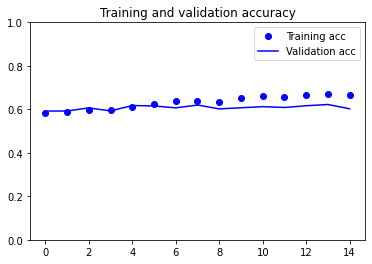

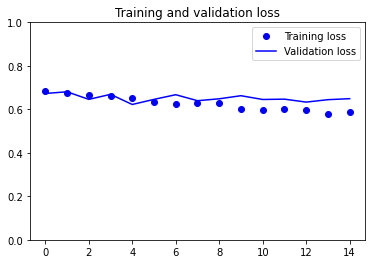

[0 1]
Normalized confusion matrix


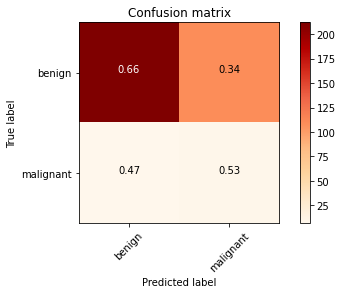

In [ ]:
tf.random.set_seed(7)
model4 = models.Sequential()
model4.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1), padding='same'))
model4.add(layers.Dropout(rate=.2))
model4.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model4.add(layers.Dropout(rate=.2))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model4.add(layers.Dropout(rate=.2))
model4.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model4.add(layers.Dropout(rate=.2))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model4.add(layers.Dropout(rate=.2))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model4.add(layers.Dropout(rate=.2))
model4.add(layers.MaxPooling2D((2, 2)))

model4.add(layers.Flatten())
model4.add(layers.Dense(256, activation='relu'))
model4.add(layers.Dropout(rate=.2))
model4.add(layers.Dense(256, activation='relu'))
model4.add(layers.Dense(2, activation='sigmoid'))

model4.summary()

model4.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

earlyStopCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

history = model4.fit(augmentedData, augmentedLabels, epochs=100, callbacks=[earlyStopCallback], batch_size=32, validation_split=0.2)

pred = model4.predict_classes(testSet) 
print(metrics.classification_report(testLabels,pred))
test_loss, test_acc = model4.evaluate(testSet, testLabelsCategorical)
print(test_loss, test_acc)
plot_accurancy_loss(history)
plot_confusionMatrix(model4, testSet, testLabels, ['benign', 'malignant'])

# **Roc Analysis**

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 202

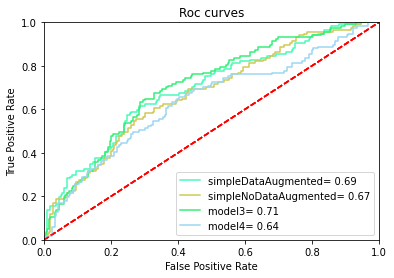

In [ ]:
models = [modelP, model8, model1, model4]

plotRocCurves(models, testSet, testLabels, ['simpleDataAugmented', 'simpleNoDataAugmented', 'model3', 'model4'])